In [1]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import scipy.interpolate
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os.path
from scipy.optimize import curve_fit
import scipy.interpolate
import pandas as pd
import plotly.validators.scatter.marker


def irrep_list_maker(energy_file):
    df = pd.read_csv(energy_file,delim_whitespace=True, header=None)
    dflist = df.values.tolist()
    irrep_list = []
    for i in range(len(dflist)):
        irrep = dflist[i][1]
    
        if len(irrep_list)==0:
            irrep_list.append(irrep)
        else:
            check_irrep_list_flag = 0
            for j in range(len(irrep_list)):
                temp_irrep = irrep_list[j]
            
                if(temp_irrep == irrep):
                    check_irrep_list_flag = 1
                    break 
            if(check_irrep_list_flag==0):
                irrep_list.append(irrep)

    return dflist, irrep_list 

def irrep_energy_list_maker(full_energy_list, fixed_irrep):
    Ecm_list = []
    Elat_list = []

    for i in range(len(full_energy_list)):
        if(full_energy_list[i][1]==fixed_irrep):
            Ecm_list.append(float(full_energy_list[i][2]))
            Elat_list.append(float(full_energy_list[i][3]))

    return Ecm_list, Elat_list 

def energy_list_maker_fixedmom(full_energy_list, fixed_mom):
    Ecm_list = []
    Elat_list = []


    for i in range(len(full_energy_list)):
        if(full_energy_list[i][1][0]==fixed_mom[0] and full_energy_list[i][1][1]==fixed_mom[1] and full_energy_list[i][1][2]==fixed_mom[2]):
            Ecm_list.append(float(full_energy_list[i][2]))
            Elat_list.append(float(full_energy_list[i][3]))

    return Ecm_list, Elat_list 



file loaded =  ultraHQ_F3_for_pole_KKpi_L20_nP_000.dat
file loaded =  ultraHQ_F3_for_pole_KKpi_L20_nP_100.dat
file loaded =  ultraHQ_F3_for_pole_KKpi_L20_nP_110.dat
file loaded =  ultraHQ_F3_for_pole_KKpi_L20_nP_111.dat
file loaded =  ultraHQ_F3_for_pole_KKpi_L20_nP_200.dat


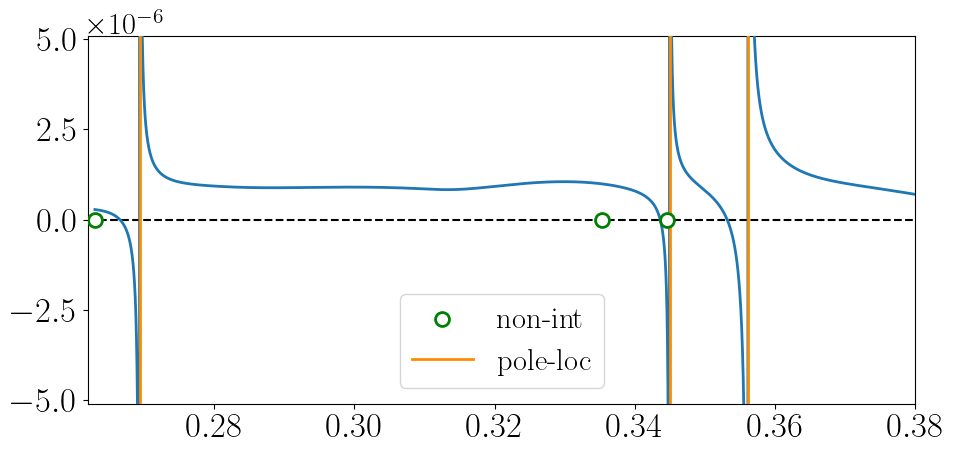

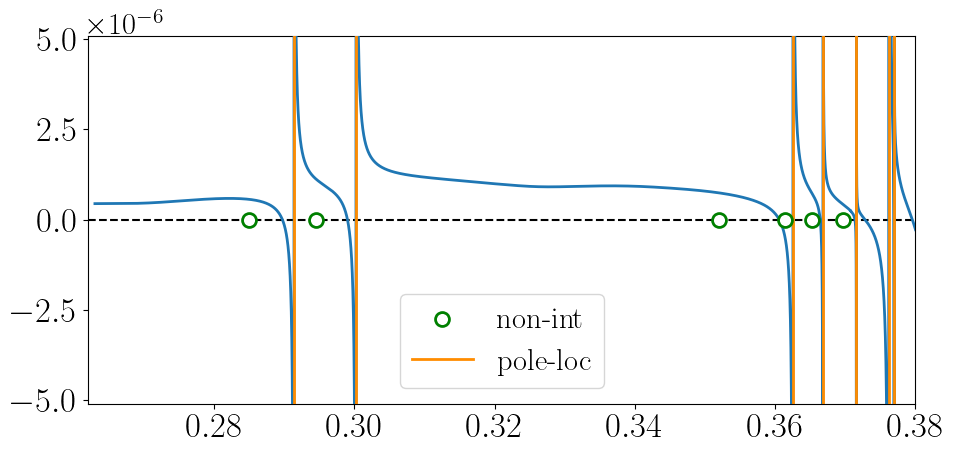

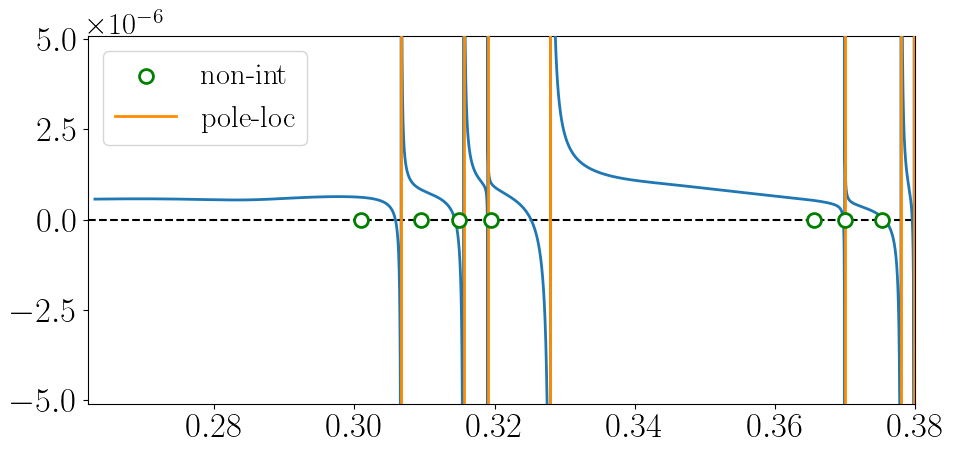

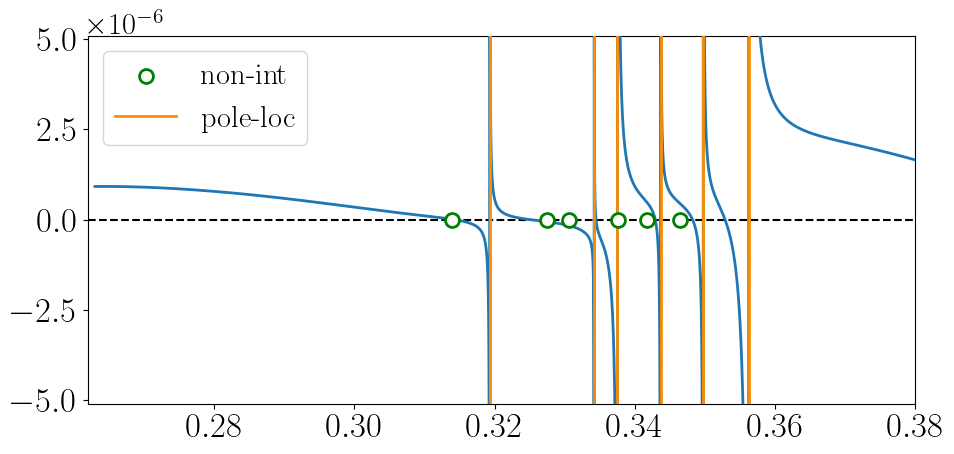

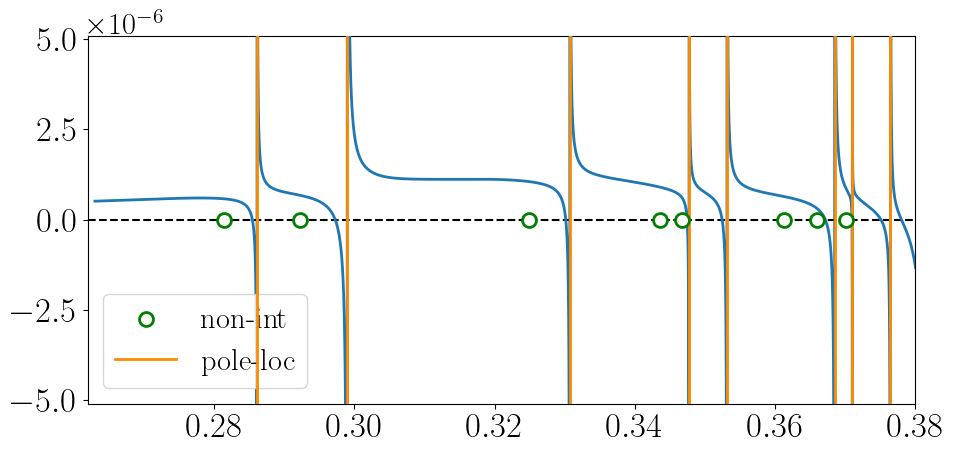

In [38]:
# Here we plot the F3 function for each boost frame and compare them with 
# free spectrum generated from threebody_non_int_spectrum() code 


#This plots F3_iso for different total momentum P
#This is for KKpi system

#We also plot the KDF0 spectrum to check which pole are correct
#and make changes to the spectrum accordingly



plt.rcParams.update({'font.size': 22})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)

drive = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3inv_KKpi_pole_testing/"
filename1 = "ultraHQ_F3_for_pole_KKpi_L20_nP_000.dat"
filename2 = "ultraHQ_F3_for_pole_KKpi_L20_nP_100.dat"
filename3 = "ultraHQ_F3_for_pole_KKpi_L20_nP_110.dat"
filename4 = "ultraHQ_F3_for_pole_KKpi_L20_nP_111.dat"
filename5 = "ultraHQ_F3_for_pole_KKpi_L20_nP_200.dat"

spectrum1 = "non_int_3body_nP000.dat"
spectrum2 = "non_int_3body_nP100.dat"
spectrum3 = "non_int_3body_nP110.dat"
spectrum4 = "non_int_3body_nP111.dat"
spectrum5 = "non_int_3body_nP200.dat"

drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3iso_jackavg_lattice_data/"

F3lat_file_string1 = drive1 + "F3iso_jackavg_P"
F3lat_file_string2 = "_state_"
F3lat_central_file_string = drive1 + "F3iso_jackavg_centralval_P"

kdf0_spectrum1 = drive + "Kdf0_spectrum_nP_000_L20.dat"
kdf0_spectrum2 = drive + "Kdf0_spectrum_nP_100_L20.dat"
kdf0_spectrum3 = drive + "Kdf0_spectrum_nP_110_L20.dat"
kdf0_spectrum4 = drive + "Kdf0_spectrum_nP_111_L20.dat"
kdf0_spectrum5 = drive + "Kdf0_spectrum_nP_200_L20.dat"

atmpi = 1#0.06906

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
kdf_spec_filelist = [kdf0_spectrum1, kdf0_spectrum2, kdf0_spectrum3, kdf0_spectrum4, kdf0_spectrum5 ]
#additionalpole_filelist = [spectrum1, spectrum2, spectrum3, spectrum4, spectrum5]
#additionalpole_filelist1 = [Gpole1, Gpole2, Gpole3, Gpole4, Gpole5]
titlelist = ["000","100","110","111","200"]
counter = 0
energy_file = "S2I2.energies"
full_energy_list, irrep_list = irrep_list_maker(energy_file)
selected_irrep_list = ["000_A1m","100_A2","110_A1","111_A2","200_A2"]

non_int_file_drive = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/lattice_data/KKpi_interacting_spectrum/Three_body/L_20_only/"

non_int_file_drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/L20_3body_nonint_spec_points/"
for file in filelist:
    fig,ax = plt.subplots(figsize=(10,5))

    print("file loaded = ",file)
    filename = file 
    (En, EcmR, norm, F3, 
     F2, G, K2i, H) = np.genfromtxt(filename, unpack=True)

    spec_file = kdf_spec_filelist[counter]
    (L_spec, kdf_spec) = np.genfromtxt(spec_file, unpack=True)
   #here F3det1 and F3iso1 are the denom part multiplied with 1 vector on both sides 

    non_int_energies_ecm, non_int_energies_elab = energy_list_maker_fixedmom(full_energy_list, titlelist[counter])

    non_int_file = non_int_file_drive + "non_int_L20_points_"+ str(selected_irrep_list[counter]) + ".dat" 
    
    non_int_cbased_file = non_int_file_drive1 + "3body_non_int_points_using_c_code_L20_P" + str(titlelist[counter]) + ".dat"
    
    Lnonint, non_int_energies_ecm1 = np.genfromtxt(non_int_file, unpack=True)
    non_int_cbased = np.genfromtxt(non_int_cbased_file, unpack=True)

    zero_y_val = []
    for i in range(len(non_int_energies_ecm1)):
        zero_y_val.append(0.0)
    
    np_zero_y_val = np.array(zero_y_val)

    zero_y_val1 = []
    for i in range(len(non_int_cbased)):
        zero_y_val1.append(0.0)
    
    np_zero_y_val1 = np.array(zero_y_val1)

    #change this
    #ax.set_xlim(0.362,0.39)
    #ax.set_xlim(0.43,0.45)
    
    ax.set_xlim(0.262,0.38)
    #ax[counter].set_ylim(-1E-17,1E-17)
    ax.set_ylim(-0.0000051,0.0000051)
    #ax.set_ylim(-0.51,0.51)
    #ax.set_ylim(-1E8,1E8)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    HFGtitle = "$(\mathcal{K}_2^{-1} + F_2 + G)^{-1}$"
    titlestring = "$P = $" + str(titlelist[counter])
    
    #change this 
    #ax.set_title(titlestring)
    ax.plot(EcmR,F3, linewidth=2, zorder=4)
    #ax[counter].plot(EcmR,F2sum, linewidth=3, zorder=4,label="$F_2$")
    #ax[counter].plot(EcmR,Gsum, linewidth=3, zorder=4,label="$G$")
    #ax[counter].plot(EcmR,K2iplusFplusG, linewidth=3, zorder=4,label="$\\mathcal{K}_2^{-1} + F+G$")
    
    #ax[counter].plot(EcmR1,F21sum, linewidth=3, label=str("$F_2$, ") + titlestring)
    #ax[counter].plot(EcmR1,F3iso1/10000000000, linewidth=4, color='red', label=HFGtitle, zorder=3)
    #ax.scatter(non_int_energies_ecm1,zero_y_val, marker='o', s=100, linewidth=2,edgecolor="green", facecolor='white',zorder=7,label="non-int")
    
    ax.scatter(non_int_cbased,zero_y_val1, marker='o', s=100, linewidth=2,edgecolor="green", facecolor='white',zorder=7,label="non-int")
    
    #ax[counter].scatter(gpole1,zero_y_val1, marker='o', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].scatter(Ecm_int,np_zero_y_val2, marker='s', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax.axhline(y=0,linestyle='--',color='black',zorder=2)

    #change this
    #ax.axvline(x=0.37,linestyle='--',color='black',zorder=2)
    
    for i in range(len(kdf_spec)):
        ax.axvline(x=kdf_spec[i],linestyle='solid',linewidth=2,color='darkorange',zorder=6,label="pole-loc" if i==0 else "")
    
    for state in range(8):
        F3file = F3lat_file_string1 + titlelist[counter] + F3lat_file_string2 + str(state) + ".dat"
        if(os.path.exists(F3file)):
            (F3_Elab, F3_Ecm, F3_latt) = np.genfromtxt(F3file,unpack=True)
            #ax.scatter(F3_Ecm,F3_latt, marker='o', s=50, edgecolor="red", facecolor='white',zorder=5,label="latt. spectrum" if state==0 else "")
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax.legend()
    
    #change this
    #ax.set_xlabel("$a_t E_{cm}$", fontsize=25)
    #ax.set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
    fig.tight_layout()
    plt.draw()
    outputfile_str = "F3_KKpi_L20_v5_ultraHQ_nnP" + titlelist[counter] + ".pdf"
    plt.savefig(outputfile_str)
    counter=counter+1



#plt.close()

#print(full_energy_list[0][1][2])

file loaded =  ultraHQ_F3_for_pole_KKpi_L20_nP_000_mapiK_3.840000_maKK_4.000000.dat
file loaded =  ultraHQ_F3_for_pole_KKpi_L20_nP_100_mapiK_3.840000_maKK_4.000000.dat
file loaded =  ultraHQ_F3_for_pole_KKpi_L20_nP_110_mapiK_3.840000_maKK_4.000000.dat
file loaded =  ultraHQ_F3_for_pole_KKpi_L20_nP_111_mapiK_3.840000_maKK_4.000000.dat
file loaded =  ultraHQ_F3_for_pole_KKpi_L20_nP_200_mapiK_3.840000_maKK_4.000000.dat


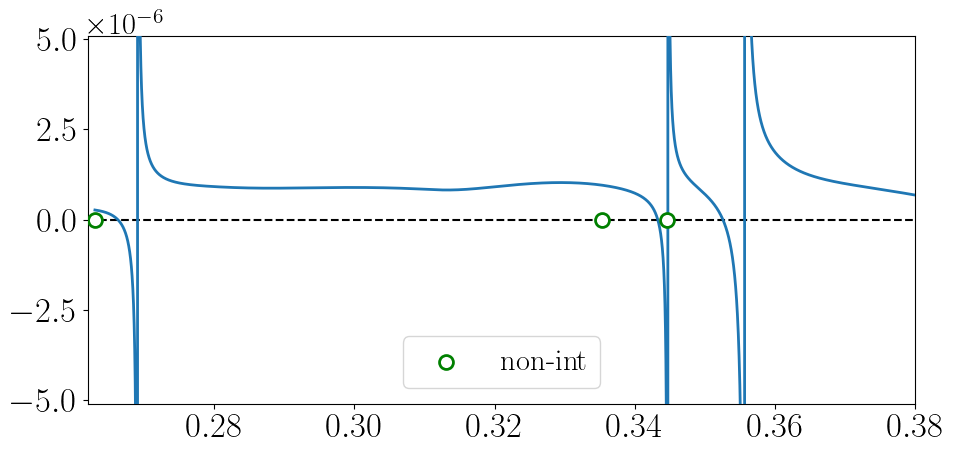

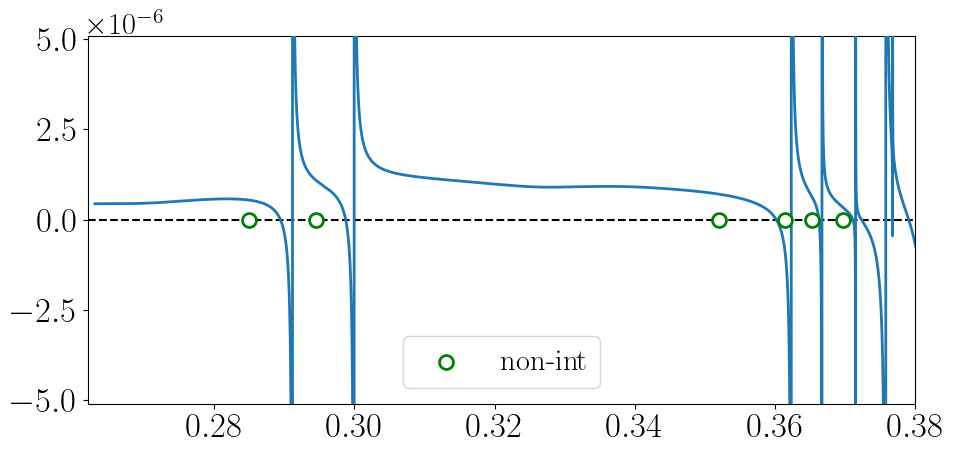

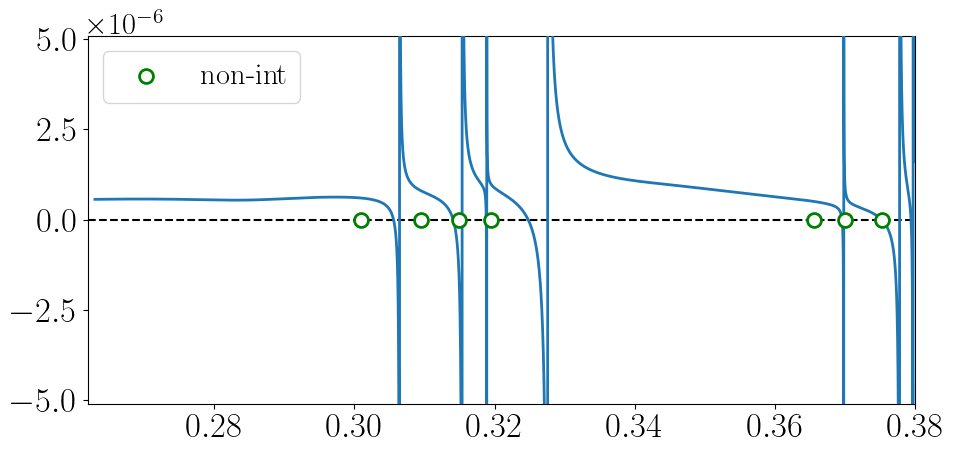

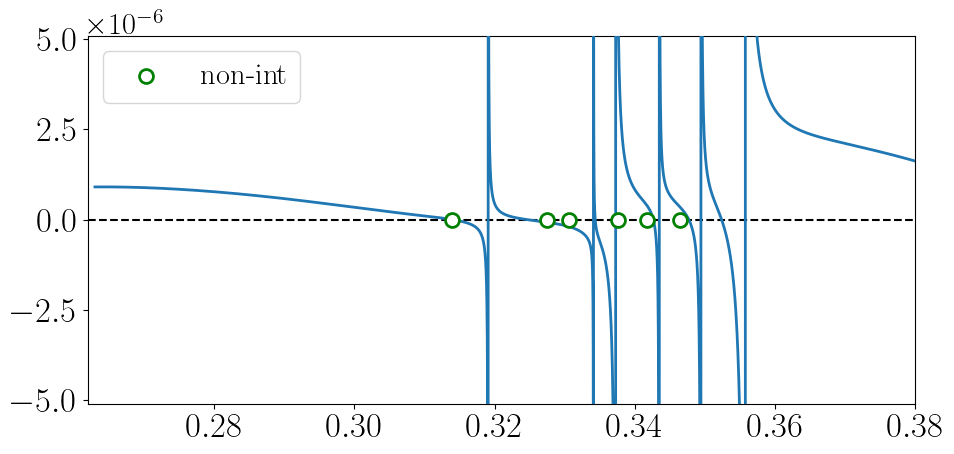

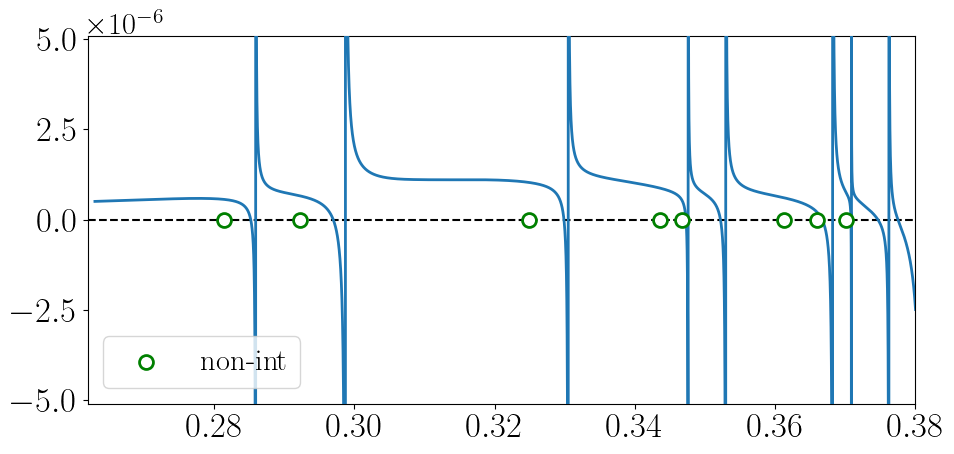

In [39]:
# Here we plot the F3 function for each boost frame and compare them with 
# free spectrum generated from threebody_non_int_spectrum() code 


#This plots F3_iso for different total momentum P
#This is for KKpi system

#We also plot the KDF0 spectrum to check which pole are correct
#and make changes to the spectrum accordingly



plt.rcParams.update({'font.size': 22})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)

drive = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3inv_KKpi_pole_testing/"
filename1 = "ultraHQ_F3_for_pole_KKpi_L20_nP_000_mapiK_3.840000_maKK_4.000000.dat"
filename2 = "ultraHQ_F3_for_pole_KKpi_L20_nP_100_mapiK_3.840000_maKK_4.000000.dat"
filename3 = "ultraHQ_F3_for_pole_KKpi_L20_nP_110_mapiK_3.840000_maKK_4.000000.dat"
filename4 = "ultraHQ_F3_for_pole_KKpi_L20_nP_111_mapiK_3.840000_maKK_4.000000.dat"
filename5 = "ultraHQ_F3_for_pole_KKpi_L20_nP_200_mapiK_3.840000_maKK_4.000000.dat"

spectrum1 = "non_int_3body_nP000.dat"
spectrum2 = "non_int_3body_nP100.dat"
spectrum3 = "non_int_3body_nP110.dat"
spectrum4 = "non_int_3body_nP111.dat"
spectrum5 = "non_int_3body_nP200.dat"

drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3iso_jackavg_lattice_data/"

F3lat_file_string1 = drive1 + "F3iso_jackavg_P"
F3lat_file_string2 = "_state_"
F3lat_central_file_string = drive1 + "F3iso_jackavg_centralval_P"

kdf0_spectrum1 = drive + "Kdf0_spectrum_nP_000_L20.dat"
kdf0_spectrum2 = drive + "Kdf0_spectrum_nP_100_L20.dat"
kdf0_spectrum3 = drive + "Kdf0_spectrum_nP_110_L20.dat"
kdf0_spectrum4 = drive + "Kdf0_spectrum_nP_111_L20.dat"
kdf0_spectrum5 = drive + "Kdf0_spectrum_nP_200_L20.dat"

atmpi = 1#0.06906

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
kdf_spec_filelist = [kdf0_spectrum1, kdf0_spectrum2, kdf0_spectrum3, kdf0_spectrum4, kdf0_spectrum5 ]
#additionalpole_filelist = [spectrum1, spectrum2, spectrum3, spectrum4, spectrum5]
#additionalpole_filelist1 = [Gpole1, Gpole2, Gpole3, Gpole4, Gpole5]
titlelist = ["000","100","110","111","200"]
counter = 0
energy_file = "S2I2.energies"
full_energy_list, irrep_list = irrep_list_maker(energy_file)
selected_irrep_list = ["000_A1m","100_A2","110_A1","111_A2","200_A2"]

non_int_file_drive = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/lattice_data/KKpi_interacting_spectrum/Three_body/L_20_only/"

non_int_file_drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/L20_3body_nonint_spec_points/"
for file in filelist:
    fig,ax = plt.subplots(figsize=(10,5))

    print("file loaded = ",file)
    filename = file 
    (En, EcmR, norm, F3, 
     F2, G, K2i, H) = np.genfromtxt(filename, unpack=True)

    spec_file = kdf_spec_filelist[counter]
    (L_spec, kdf_spec) = np.genfromtxt(spec_file, unpack=True)
   #here F3det1 and F3iso1 are the denom part multiplied with 1 vector on both sides 

    non_int_energies_ecm, non_int_energies_elab = energy_list_maker_fixedmom(full_energy_list, titlelist[counter])

    non_int_file = non_int_file_drive + "non_int_L20_points_"+ str(selected_irrep_list[counter]) + ".dat" 
    
    non_int_cbased_file = non_int_file_drive1 + "3body_non_int_points_using_c_code_L20_P" + str(titlelist[counter]) + ".dat"
    
    Lnonint, non_int_energies_ecm1 = np.genfromtxt(non_int_file, unpack=True)
    non_int_cbased = np.genfromtxt(non_int_cbased_file, unpack=True)

    zero_y_val = []
    for i in range(len(non_int_energies_ecm1)):
        zero_y_val.append(0.0)
    
    np_zero_y_val = np.array(zero_y_val)

    zero_y_val1 = []
    for i in range(len(non_int_cbased)):
        zero_y_val1.append(0.0)
    
    np_zero_y_val1 = np.array(zero_y_val1)

    #change this
    #ax.set_xlim(0.362,0.39)
    #ax.set_xlim(0.43,0.45)
    
    ax.set_xlim(0.262,0.38)
    #ax[counter].set_ylim(-1E-17,1E-17)
    ax.set_ylim(-0.0000051,0.0000051)
    #ax.set_ylim(-0.51,0.51)
    #ax.set_ylim(-1E8,1E8)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    HFGtitle = "$(\mathcal{K}_2^{-1} + F_2 + G)^{-1}$"
    titlestring = "$P = $" + str(titlelist[counter])
    
    #change this 
    #ax.set_title(titlestring)
    ax.plot(EcmR,F3, linewidth=2, zorder=4)
    #ax[counter].plot(EcmR,F2sum, linewidth=3, zorder=4,label="$F_2$")
    #ax[counter].plot(EcmR,Gsum, linewidth=3, zorder=4,label="$G$")
    #ax[counter].plot(EcmR,K2iplusFplusG, linewidth=3, zorder=4,label="$\\mathcal{K}_2^{-1} + F+G$")
    
    #ax[counter].plot(EcmR1,F21sum, linewidth=3, label=str("$F_2$, ") + titlestring)
    #ax[counter].plot(EcmR1,F3iso1/10000000000, linewidth=4, color='red', label=HFGtitle, zorder=3)
    #ax.scatter(non_int_energies_ecm1,zero_y_val, marker='o', s=100, linewidth=2,edgecolor="green", facecolor='white',zorder=7,label="non-int")
    
    ax.scatter(non_int_cbased,zero_y_val1, marker='o', s=100, linewidth=2,edgecolor="green", facecolor='white',zorder=7,label="non-int")
    
    #ax[counter].scatter(gpole1,zero_y_val1, marker='o', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].scatter(Ecm_int,np_zero_y_val2, marker='s', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax.axhline(y=0,linestyle='--',color='black',zorder=2)

    #change this
    #ax.axvline(x=0.37,linestyle='--',color='black',zorder=2)
    
    #for i in range(len(kdf_spec)):
    #    ax.axvline(x=kdf_spec[i],linestyle='solid',linewidth=2,color='darkorange',zorder=6,label="pole-loc" if i==0 else "")
    
    for state in range(8):
        F3file = F3lat_file_string1 + titlelist[counter] + F3lat_file_string2 + str(state) + ".dat"
        if(os.path.exists(F3file)):
            (F3_Elab, F3_Ecm, F3_latt) = np.genfromtxt(F3file,unpack=True)
            #ax.scatter(F3_Ecm,F3_latt, marker='o', s=50, edgecolor="red", facecolor='white',zorder=5,label="latt. spectrum" if state==0 else "")
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax.legend()
    
    #change this
    #ax.set_xlabel("$a_t E_{cm}$", fontsize=25)
    #ax.set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
    fig.tight_layout()
    plt.draw()
    outputfile_str = "F3_KKpi_L20_v5_ultraHQ_nnP" + titlelist[counter] + "_mapiK_3.840000_maKK_4.000000.pdf"
    plt.savefig(outputfile_str)
    counter=counter+1



#plt.close()

#print(full_energy_list[0][1][2])

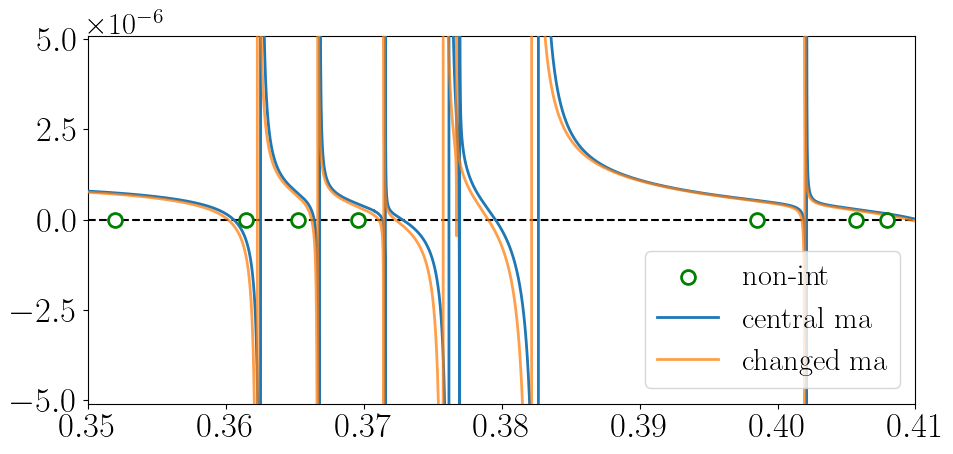

In [64]:
# Here compare the F3 function for 2 different scattering lengths of piK and KK 
# This is also for boost P = 100


plt.rcParams.update({'font.size': 22})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)

drive = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3inv_KKpi_pole_testing/"
filename1 = "ultraHQ_F3_for_pole_KKpi_L20_nP_100.dat"
filename2 = "ultraHQ_F3_for_pole_KKpi_L20_nP_100_mapiK_3.840000_maKK_4.000000.dat"

drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3iso_jackavg_lattice_data/"


atmpi = 1#0.06906


non_int_file_drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/L20_3body_nonint_spec_points/"

fig,ax = plt.subplots(figsize=(10,5))

non_int_cbased_file = non_int_file_drive1 + "3body_non_int_points_using_c_code_L20_P100.dat"

(En, EcmR, norm, F3, 
     F2, G, K2i, H) = np.genfromtxt(filename1, unpack=True)
(En1, EcmR1, norm1, F31, 
     F21, G1, K2i1, H1) = np.genfromtxt(filename2, unpack=True)
non_int_cbased = np.genfromtxt(non_int_cbased_file, unpack=True)

zero_y_val1 = []
for i in range(len(non_int_cbased)):
    zero_y_val1.append(0.0)
    
np_zero_y_val1 = np.array(zero_y_val1)

ax.set_xlim(0.35,0.41)
#ax[counter].set_ylim(-1E-17,1E-17)
ax.set_ylim(-0.0000051,0.0000051)
#ax.set_ylim(-0.51,0.51)
#ax.set_ylim(-1E8,1E8)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)

ax.scatter(non_int_cbased,zero_y_val1, marker='o', s=100, linewidth=2,edgecolor="green", facecolor='white',zorder=7,label="non-int")
ax.axhline(y=0,linestyle='--',color='black',zorder=2)
ax.plot(EcmR,F3, linewidth=2, zorder=4, label="central ma")
ax.plot(EcmR1,F31, linewidth=2, zorder=4, alpha=0.75, label="changed ma")
        
ax.legend()

fig.tight_layout()
plt.draw()
outputfile_str = "F3_KKpi_L20_v5_ultraHQ_nnP100_comparison_ma.pdf"
plt.savefig(outputfile_str)



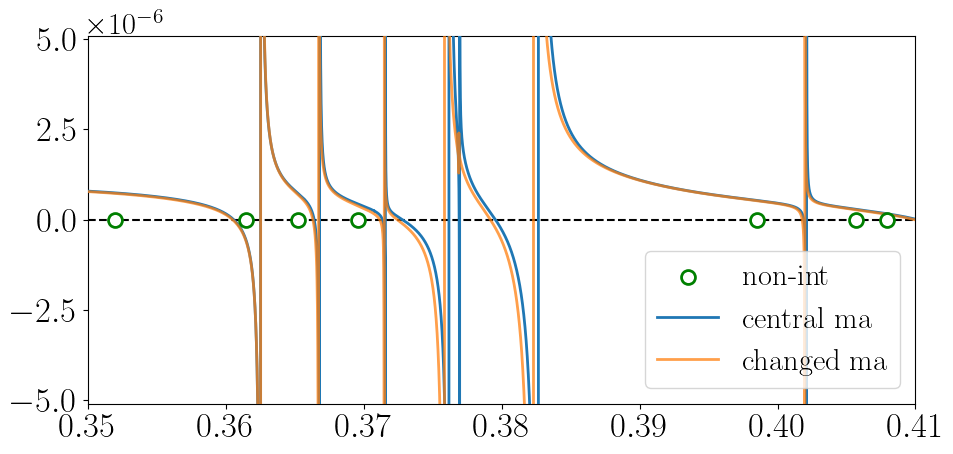

In [63]:
# Here compare the F3 function for 2 different scattering lengths of piK and KK 
# This is also for boost P = 100


plt.rcParams.update({'font.size': 22})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)

drive = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3inv_KKpi_pole_testing/"
filename1 = "ultraHQ_F3_for_pole_KKpi_L20_nP_100.dat"
filename2 = "ultraHQ_F3_for_pole_KKpi_L20_nP_100_mapiK_3.840000_maKK_4.140000.dat"

drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3iso_jackavg_lattice_data/"


atmpi = 1#0.06906


non_int_file_drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/L20_3body_nonint_spec_points/"

fig,ax = plt.subplots(figsize=(10,5))

non_int_cbased_file = non_int_file_drive1 + "3body_non_int_points_using_c_code_L20_P100.dat"

(En, EcmR, norm, F3, 
     F2, G, K2i, H) = np.genfromtxt(filename1, unpack=True)
(En1, EcmR1, norm1, F31, 
     F21, G1, K2i1, H1) = np.genfromtxt(filename2, unpack=True)
non_int_cbased = np.genfromtxt(non_int_cbased_file, unpack=True)

zero_y_val1 = []
for i in range(len(non_int_cbased)):
    zero_y_val1.append(0.0)
    
np_zero_y_val1 = np.array(zero_y_val1)

ax.set_xlim(0.35,0.41)
#ax[counter].set_ylim(-1E-17,1E-17)
ax.set_ylim(-0.0000051,0.0000051)
#ax.set_ylim(-0.51,0.51)
#ax.set_ylim(-1E8,1E8)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)

ax.scatter(non_int_cbased,zero_y_val1, marker='o', s=100, linewidth=2,edgecolor="green", facecolor='white',zorder=7,label="non-int")
ax.axhline(y=0,linestyle='--',color='black',zorder=2)
ax.plot(EcmR,F3, linewidth=2, zorder=4, label="central ma")
ax.plot(EcmR1,F31, linewidth=2, zorder=4, alpha=0.75, label="changed ma")
        
ax.legend()

fig.tight_layout()
plt.draw()
outputfile_str = "F3_KKpi_L20_v5_ultraHQ_nnP100_comparison_ma_1.pdf"
plt.savefig(outputfile_str)



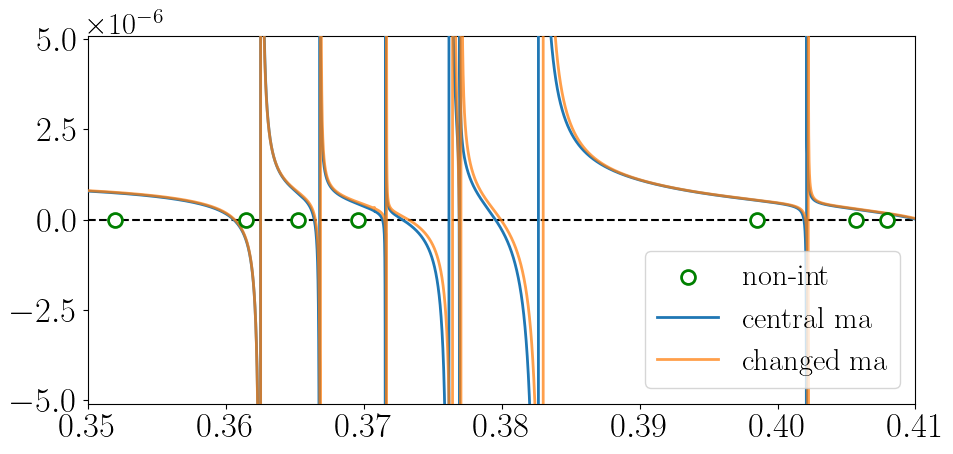

In [62]:
# Here compare the F3 function for 2 different scattering lengths of piK and KK 
# This is also for boost P = 100


plt.rcParams.update({'font.size': 22})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)

drive = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3inv_KKpi_pole_testing/"
filename1 = "ultraHQ_F3_for_pole_KKpi_L20_nP_100.dat"
filename2 = "ultraHQ_F3_for_pole_KKpi_L20_nP_100_mapiK_4.240000_maKK_4.000000.dat"

drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3iso_jackavg_lattice_data/"


atmpi = 1#0.06906


non_int_file_drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/L20_3body_nonint_spec_points/"

fig,ax = plt.subplots(figsize=(10,5))

non_int_cbased_file = non_int_file_drive1 + "3body_non_int_points_using_c_code_L20_P100.dat"

(En, EcmR, norm, F3, 
     F2, G, K2i, H) = np.genfromtxt(filename1, unpack=True)
(En1, EcmR1, norm1, F31, 
     F21, G1, K2i1, H1) = np.genfromtxt(filename2, unpack=True)
non_int_cbased = np.genfromtxt(non_int_cbased_file, unpack=True)

zero_y_val1 = []
for i in range(len(non_int_cbased)):
    zero_y_val1.append(0.0)
    
np_zero_y_val1 = np.array(zero_y_val1)

ax.set_xlim(0.35,0.41)
#ax[counter].set_ylim(-1E-17,1E-17)
ax.set_ylim(-0.0000051,0.0000051)
#ax.set_ylim(-0.51,0.51)
#ax.set_ylim(-1E8,1E8)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)

ax.scatter(non_int_cbased,zero_y_val1, marker='o', s=100, linewidth=2,edgecolor="green", facecolor='white',zorder=7,label="non-int")
ax.axhline(y=0,linestyle='--',color='black',zorder=2)
ax.plot(EcmR,F3, linewidth=2, zorder=4, label="central ma")
ax.plot(EcmR1,F31, linewidth=2, zorder=4, alpha=0.75, label="changed ma")
        
ax.legend()

fig.tight_layout()
plt.draw()
outputfile_str = "F3_KKpi_L20_v5_ultraHQ_nnP100_comparison_ma_2.pdf"
plt.savefig(outputfile_str)



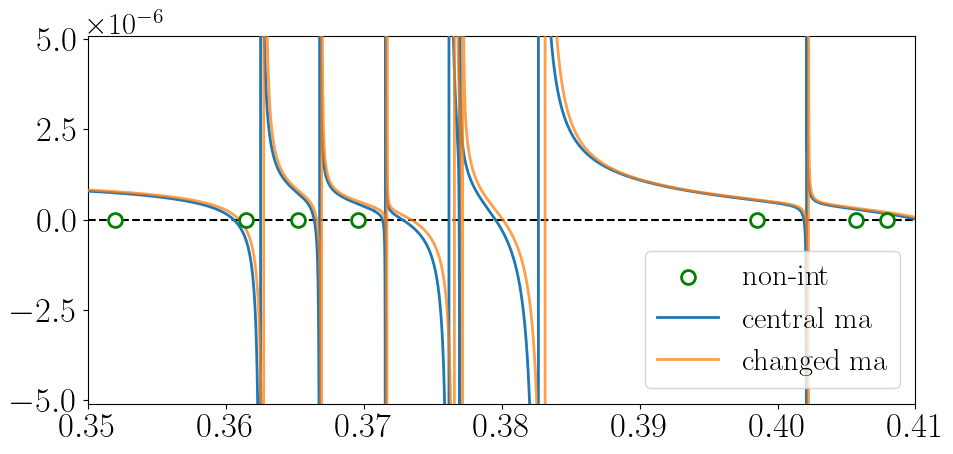

In [61]:
# Here compare the F3 function for 2 different scattering lengths of piK and KK 
# This is also for boost P = 100


plt.rcParams.update({'font.size': 22})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)

drive = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3inv_KKpi_pole_testing/"
filename1 = "ultraHQ_F3_for_pole_KKpi_L20_nP_100.dat"
filename2 = "ultraHQ_F3_for_pole_KKpi_L20_nP_100_mapiK_4.240000_maKK_4.140000.dat"

drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3iso_jackavg_lattice_data/"


atmpi = 1#0.06906


non_int_file_drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/L20_3body_nonint_spec_points/"

fig,ax = plt.subplots(figsize=(10,5))

non_int_cbased_file = non_int_file_drive1 + "3body_non_int_points_using_c_code_L20_P100.dat"

(En, EcmR, norm, F3, 
     F2, G, K2i, H) = np.genfromtxt(filename1, unpack=True)
(En1, EcmR1, norm1, F31, 
     F21, G1, K2i1, H1) = np.genfromtxt(filename2, unpack=True)

non_int_cbased = np.genfromtxt(non_int_cbased_file, unpack=True)
zero_y_val1 = []
for i in range(len(non_int_cbased)):
    zero_y_val1.append(0.0)
    
np_zero_y_val1 = np.array(zero_y_val1)

ax.set_xlim(0.35,0.41)
#ax[counter].set_ylim(-1E-17,1E-17)
ax.set_ylim(-0.0000051,0.0000051)
#ax.set_ylim(-0.51,0.51)
#ax.set_ylim(-1E8,1E8)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)

ax.scatter(non_int_cbased,zero_y_val1, marker='o', s=100, linewidth=2,edgecolor="green", facecolor='white',zorder=7,label="non-int")
ax.axhline(y=0,linestyle='--',color='black',zorder=2)
ax.plot(EcmR,F3, linewidth=2, zorder=4, label="central ma")
ax.plot(EcmR1,F31, linewidth=2, zorder=4, alpha=0.75, label="changed ma")
        
ax.legend()

fig.tight_layout()
plt.draw()
outputfile_str = "F3_KKpi_L20_v5_ultraHQ_nnP100_comparison_ma_3.pdf"
plt.savefig(outputfile_str)



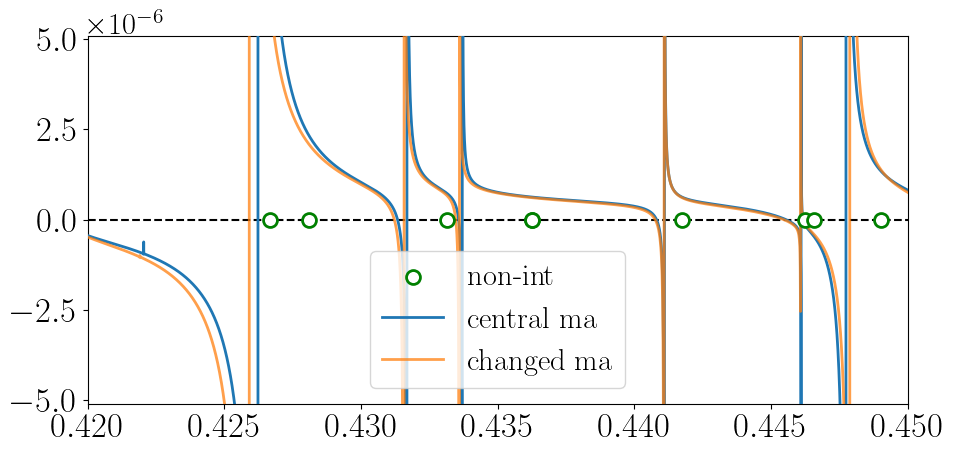

In [67]:
# Here compare the F3 function for 2 different scattering lengths of piK and KK 
# This is also for boost P = 111


plt.rcParams.update({'font.size': 22})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)

drive = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3inv_KKpi_pole_testing/"
filename1 = "ultraHQ_F3_for_pole_KKpi_L20_nP_111.dat"
filename2 = "ultraHQ_F3_for_pole_KKpi_L20_nP_111_mapiK_3.840000_maKK_4.140000.dat"

drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3iso_jackavg_lattice_data/"


atmpi = 1#0.06906


non_int_file_drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/L20_3body_nonint_spec_points/"

fig,ax = plt.subplots(figsize=(10,5))

non_int_cbased_file = non_int_file_drive1 + "3body_non_int_points_using_c_code_L20_P111.dat"

(En, EcmR, norm, F3, 
     F2, G, K2i, H) = np.genfromtxt(filename1, unpack=True)
(En1, EcmR1, norm1, F31, 
     F21, G1, K2i1, H1) = np.genfromtxt(filename2, unpack=True)
non_int_cbased = np.genfromtxt(non_int_cbased_file, unpack=True)

zero_y_val1 = []
for i in range(len(non_int_cbased)):
    zero_y_val1.append(0.0)
    
np_zero_y_val1 = np.array(zero_y_val1)

ax.set_xlim(0.42,0.45)
#ax[counter].set_ylim(-1E-17,1E-17)
ax.set_ylim(-0.0000051,0.0000051)
#ax.set_ylim(-0.51,0.51)
#ax.set_ylim(-1E8,1E8)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)

ax.scatter(non_int_cbased,zero_y_val1, marker='o', s=100, linewidth=2,edgecolor="green", facecolor='white',zorder=7,label="non-int")
ax.axhline(y=0,linestyle='--',color='black',zorder=2)
ax.plot(EcmR,F3, linewidth=2, zorder=4, label="central ma")
ax.plot(EcmR1,F31, linewidth=2, zorder=4, alpha=0.75, label="changed ma")
        
ax.legend()

fig.tight_layout()
plt.draw()
outputfile_str = "F3_KKpi_L20_v5_ultraHQ_nnP111_comparison_ma_1.pdf"
plt.savefig(outputfile_str)



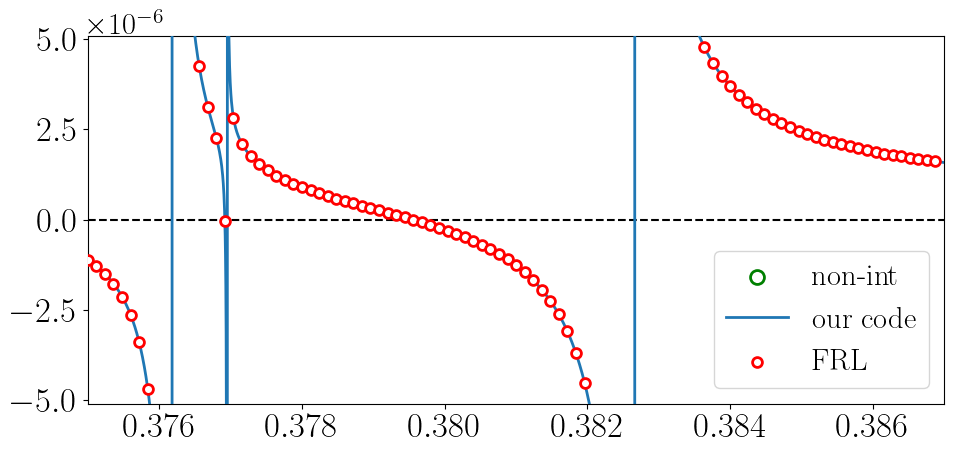

In [69]:


# Here compare the F3 function for our code and FRL code
# we check the Ecm sector where we find poles in F3 that 
# doesnt correspond with any non-int spectrum 
# This is also for boost P = 111


plt.rcParams.update({'font.size': 22})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)

drive = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3inv_KKpi_pole_testing/"
filename1 = "ultraHQ_F3_for_pole_KKpi_L20_nP_100.dat"
filename2 = "no_nonint_check_F3_KKpi_FRL_L20_nP001.dat"

drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/F3iso_jackavg_lattice_data/"


atmpi = 1#0.06906


non_int_file_drive1 = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/test_files/L20_3body_nonint_spec_points/"

fig,ax = plt.subplots(figsize=(10,5))

non_int_cbased_file = non_int_file_drive1 + "3body_non_int_points_using_c_code_L20_P111.dat"

(En, EcmR, norm, F3, 
     F2, G, K2i, H) = np.genfromtxt(filename1, unpack=True)
(En1, EcmR1, F31 ) = np.genfromtxt(filename2, unpack=True)
non_int_cbased = np.genfromtxt(non_int_cbased_file, unpack=True)

zero_y_val1 = []
for i in range(len(non_int_cbased)):
    zero_y_val1.append(0.0)
    
np_zero_y_val1 = np.array(zero_y_val1)

ax.set_xlim(0.375,0.387)
#ax[counter].set_ylim(-1E-17,1E-17)
ax.set_ylim(-0.0000051,0.0000051)
#ax.set_ylim(-0.51,0.51)
#ax.set_ylim(-1E8,1E8)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)

ax.scatter(non_int_cbased,zero_y_val1, marker='o', s=100, linewidth=2,edgecolor="green", facecolor='white',zorder=7,label="non-int")
ax.axhline(y=0,linestyle='--',color='black',zorder=2)
ax.plot(EcmR,F3, linewidth=2, zorder=4, label="our code")
ax.scatter(EcmR1,F31, marker='o', s=50, linewidth=2,edgecolor="red", facecolor='white',zorder=7, label="FRL")
        
ax.legend()

fig.tight_layout()
plt.draw()
outputfile_str = "F3_KKpi_L20_v5_ultraHQ_nnP100_comparison_FRLvsUS.pdf"
plt.savefig(outputfile_str)

